# A simple analysis using the plot-likert module

In [1]:
from IPython.display import display, Markdown, Latex # Print markdown in jupyter
import os
import pandas as pd # Dataframes
import plot_likert # Likert scale analysis

### 1. Import dataset

In [6]:
datadir = 'data/' # add this directory in your system and store your csv data there.
table = 'scores_C.csv' # the name of my dataset. Change it to fit yours.

# Read data into a pandas dataframe
df = pd.read_csv(os.path.join(datadir, table), sep= '\t') # my data is actually a tab-separated table

if not df.empty:
    display(Markdown(f"""_Your file `{table}` is loaded_"""))
    # Look at the description of your dataset
    df.info()
else:
    print(f"""Your dataset was not loaded""")

_Your file `scores_C.csv` is loaded_

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Participant  430 non-null    object
 1   Question     430 non-null    object
 2   Response     430 non-null    object
 3   Number       430 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 13.6+ KB


#### Get some key descriptions of the dataset

In [7]:
# Get length of the dataset
df_len = len(df['Participant'])
# Get number of unique questions
questions_n = len(df['Question'].unique())
# Get number of unique participants
participants_n = len(df['Participant'].unique())
# Compensate for the difference between zero indexing and early stop in range function later
zero_range_diff = 2
range_top = df_len + zero_range_diff - participants_n

display(Markdown(f"""_Your dataset contains {questions_n} responses for each of the {participants_n} participants in my data.
Responses are stacked on top of each other so a new participant is shown every {questions_n} rows.
Here are all the columns and the top {questions_n * 2 + 1} rows_"""))
df.head(questions_n * 2 + 1)

_Your dataset contains 10 responses for each of the 43 participants in my data.
Responses are stacked on top of each other so a new participant is shown every 10 rows.
Here are all the columns and the top 21 rows_

,Participant,Question,Response,Number
0,P1,Q1,SA,7
1,P1,Q2,SA,7
2,P1,Q3,SWA,5
3,P1,Q4,SA,7
4,P1,Q5,SWA,5
5,P1,Q6,SA,7
6,P1,Q7,SA,7
7,P1,Q8,SWA,5
8,P1,Q9,SWA,5
9,P1,Q10,SA,7


### 2. Wrangle dataset
The data must be in an `ID  Question1  Question2  QuestionN` format, so we must make it fit.

In [12]:
# There are no missing (NaN) values are contained in this dataset

# Get likert scores responses in a list of list with all 29 participants and 11 responses each
scores = [df.iloc[x:x+questions_n].Response.tolist() for x in range(0, range_top, questions_n)]

# The responses must be turned into a format that fits the scale in plot_likert (see https://github.com/nmalkin/plot-likert/blob/master/plot_likert/scales.py)
# In this case, the  responses have been abbreviated as "SA, A, N" etc. We will map the responses to a standard format.
scores7_0_dict = {
"NS": "0 - Not Sure", #NS
"SD": "1 - Strongly Disagree", #SD
"D": "2 - Disagree", # D
"SWD": "3 - Somewhat Disagree", # SWD
"SWA": "4 - Somewhat Agree", # SWA
"A": "5 - Agree", # A
"SA": "6 - Strongly Agree", # SA
'NO RESPONSE': None
}

scores = [[scores7_0_dict[x] for x in subl] for subl in scores]

# =============== IGNORE THIS BIT
# The numbers in scores must be turned into strings to fit the scale in plot_likert (see https://github.com/nmalkin/plot-likert/blob/master/plot_likert/scales.py)
# scores = [[str(x) for x in subl] for subl in scores]
# Get participant IDs
# parts = [df.iat[x,0] for x in range(0, 310, 11)]
# df2['participant'] = parts

In [14]:
# Create dataframe with the scores, then add the participant IDs
question_texts = [
"1. The content and materials in this course helped me meet my learning goals in Spanish.",
"2. The content of this course was geared towards maximizing my Spanish language development.",
"3. The topics dealt with in the course were interesting and relevant to me.",
"4. The content was geared to help me overcome some of my weaknesses in Spanish.",
"5. The content was geared to help me increase the level of confidence in my Spanish language abilities.",
"6. Being in this language course was a positive experience for me.",
"7. I am happy that I enrolled in this class.",
"8. The course content has met all my expectations.",
"9. The course content has met all my expectations.",
"10. The course content contained components that I already knew.",
]
# df2 = pd.DataFrame(scores, columns = ['Q{}'.format(i) for i in range(1,12)])
df2 = pd.DataFrame(scores, columns = [i for i in question_texts])
# Look at the top 5 rows
df2.head(5)

,1. The content and materials in this course helped me meet my learning goals in Spanish.,2. The content of this course was geared towards maximizing my Spanish language development.,3. The topics dealt with in the course were interesting and relevant to me.,4. The content was geared to help me overcome some of my weaknesses in Spanish.,5. The content was geared to help me increase the level of confidence in my Spanish language abilities.,6. Being in this language course was a positive experience for me.,7. I am happy that I enrolled in this class.,8. The course content has met all my expectations.,9. The course content has met all my expectations.,10. The course content contained components that I already knew.
0,6 - Strongly Agree,6 - Strongly Agree,4 - Somewhat Agree,6 - Strongly Agree,4 - Somewhat Agree,6 - Strongly Agree,6 - Strongly Agree,4 - Somewhat Agree,4 - Somewhat Agree,6 - Strongly Agree
1,6 - Strongly Agree,6 - Strongly Agree,4 - Somewhat Agree,6 - Strongly Agree,6 - Strongly Agree,6 - Strongly Agree,6 - Strongly Agree,6 - Strongly Agree,6 - Strongly Agree,4 - Somewhat Agree
2,6 - Strongly Agree,6 - Strongly Agree,6 - Strongly Agree,6 - Strongly Agree,6 - Strongly Agree,6 - Strongly Agree,6 - Strongly Agree,6 - Strongly Agree,6 - Strongly Agree,4 - Somewhat Agree
3,0 - Not Sure,5 - Agree,5 - Agree,5 - Agree,4 - Somewhat Agree,6 - Strongly Agree,6 - Strongly Agree,4 - Somewhat Agree,4 - Somewhat Agree,4 - Somewhat Agree
4,4 - Somewhat Agree,4 - Somewhat Agree,4 - Somewhat Agree,6 - Strongly Agree,6 - Strongly Agree,6 - Strongly Agree,6 - Strongly Agree,6 - Strongly Agree,6 - Strongly Agree,6 - Strongly Agree


### 3. Analysis

##### 3.1 Raw counts

In [15]:
counts = plot_likert.likert_counts(df2, plot_likert.scales.scores7_0_custom)
counts

,0 - Not Sure,1 - Strongly Disagree,2 - Disagree,3 - Somewhat Disagree,4 - Somewhat Agree,5 - Agree,6 - Strongly Agree
1. The content and materials\nin this course helped me meet\nmy learning goals in Spanish.,1.0,0.0,2.0,0.0,13.0,5.0,18.0
2. The content of this course\nwas geared towards maximizing\nmy Spanish language\ndevelopment.,1.0,0.0,1.0,0.0,8.0,8.0,21.0
3. The topics dealt with in\nthe course were interesting\nand relevant to me.,0.0,0.0,1.0,0.0,9.0,12.0,17.0
4. The content was geared to\nhelp me overcome some of my\nweaknesses in Spanish.,0.0,0.0,2.0,0.0,9.0,10.0,18.0
5. The content was geared to\nhelp me increase the level of\nconfidence in my Spanish\nlanguage abilities.,0.0,1.0,2.0,0.0,12.0,4.0,20.0
6. Being in this language\ncourse was a positive\nexperience for me.,0.0,0.0,0.0,0.0,1.0,10.0,28.0
7. I am happy that I enrolled\nin this class.,0.0,0.0,0.0,0.0,2.0,5.0,32.0
8. The course content has met\nall my expectations.,0.0,0.0,1.0,0.0,13.0,4.0,21.0
9. The course content has met\nall my expectations.,0.0,0.0,1.0,0.0,11.0,6.0,20.0
10. The course content\ncontained components that I\nalready knew.,0.0,0.0,2.0,0.0,14.0,8.0,15.0


##### 3.2 Percentages

In [16]:
percentages = plot_likert.likert_percentages(df2, plot_likert.scales.scores7_0_custom)
percentages

/Users/damianyukioromerodiaz/Projects/likert_scale_analyses/plot_likert/plot_likert.py:152: UserWarning: Not all (sub)questions have the same number of responses. Therefore, percentages aren't directly comparable.
  "Not all (sub)questions have the same number of responses. Therefore, percentages aren't directly comparable."


,0 - Not Sure,1 - Strongly Disagree,2 - Disagree,3 - Somewhat Disagree,4 - Somewhat Agree,5 - Agree,6 - Strongly Agree
1. The content and materials\nin this course helped me meet\nmy learning goals in Spanish.,2.564103,0.000000,5.128205,0.0,33.333333,12.820513,46.153846
2. The content of this course\nwas geared towards maximizing\nmy Spanish language\ndevelopment.,2.564103,0.000000,2.564103,0.0,20.512821,20.512821,53.846154
3. The topics dealt with in\nthe course were interesting\nand relevant to me.,0.000000,0.000000,2.564103,0.0,23.076923,30.769231,43.589744
4. The content was geared to\nhelp me overcome some of my\nweaknesses in Spanish.,0.000000,0.000000,5.128205,0.0,23.076923,25.641026,46.153846
5. The content was geared to\nhelp me increase the level of\nconfidence in my Spanish\nlanguage abilities.,0.000000,2.564103,5.128205,0.0,30.769231,10.256410,51.282051
6. Being in this language\ncourse was a positive\nexperience for me.,0.000000,0.000000,0.000000,0.0,2.564103,25.641026,71.794872
7. I am happy that I enrolled\nin this class.,0.000000,0.000000,0.000000,0.0,5.128205,12.820513,82.051282
8. The course content has met\nall my expectations.,0.000000,0.000000,2.564103,0.0,33.333333,10.256410,53.846154
9. The course content has met\nall my expectations.,0.000000,0.000000,2.631579,0.0,28.947368,15.789474,52.631579
10. The course content\ncontained components that I\nalready knew.,0.000000,0.000000,5.128205,0.0,35.897436,20.512821,38.461538


### 4. Plot

In [22]:
# Customize colors
likert_colors = ['white','green', 'firebrick','lightcoral','gainsboro','turquoise','cornflowerblue', 'darkblue']

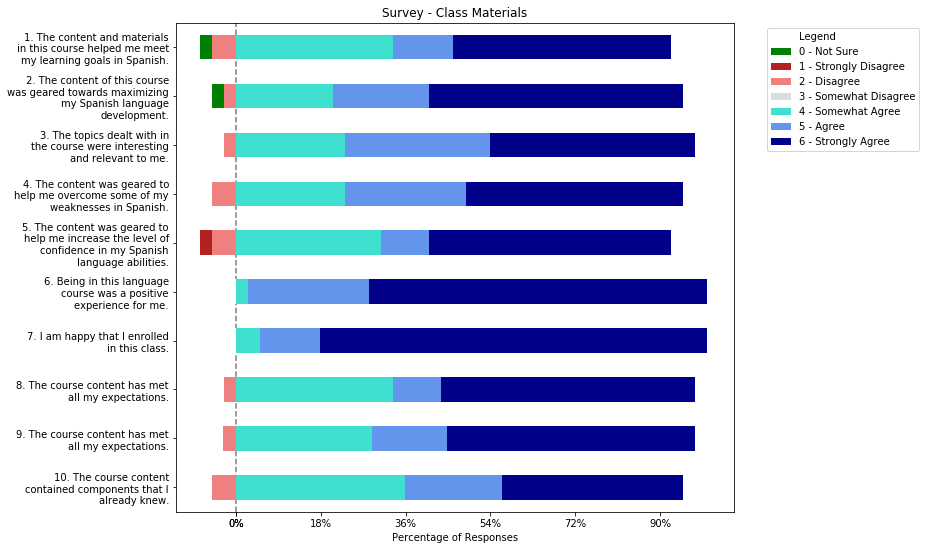

In [23]:
plot_likert.plot_counts(percentages, plot_likert.scales.scores7_0_custom, plot_percentage=True, colors=likert_colors, figsize=[10,9], title="Survey - Class Materials")